### Sales Analysis

#### Import necessary libraries

In [40]:
import pandas as pd

### Task 1. Read the sales data into dataframe

In [55]:
sales = pd.read_csv('sales_data.csv')

In [56]:
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Task 2. Which month had the highest sales and what were the sales

In [59]:
sales.Order_Date = pd.to_datetime(sales.Order_Date)
sales['Month'] = sales.Order_Date.dt.month
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [60]:
sales['Total_Sales'] = sales.Quantity_Ordered * sales.Price_Each
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [61]:
sales.groupby('Month')['Total_Sales'].sum()

Month
1     1.786511e+06
2     2.158127e+06
3     2.755969e+06
4     3.336376e+06
5     3.101881e+06
6     2.524465e+06
7     2.587445e+06
8     2.191698e+06
9     2.050361e+06
10    3.679254e+06
11    3.149785e+06
12    4.557905e+06
Name: Total_Sales, dtype: float64

#### Plot the total sales every month

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot

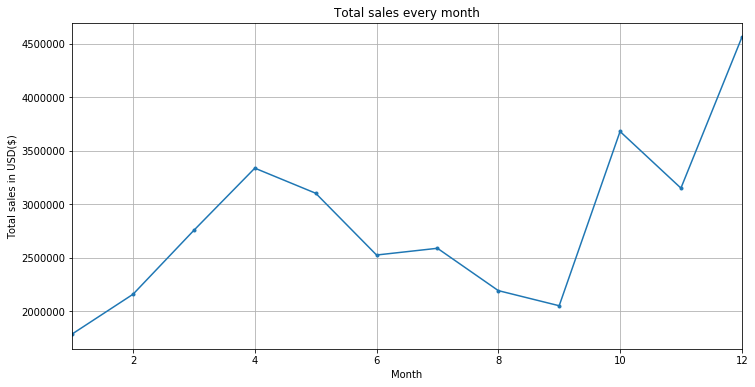

In [63]:
res = sales.groupby('Month')['Total_Sales'].sum().astype(int)
new = res.plot(title = 'Total sales every month', figsize = (12,6), style='.-')
plt.ylabel('Total sales in USD($)')
plt.grid()
for p in new.patches:
    new.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), color='black')

#### Task 3 . Which city had the highest total sales

In [64]:
sales['City'] = sales.Purchase_Address.str.split(',', expand=True)[1]
sales['City'] = sales.City.str.strip()

In [65]:
sales['State'] = sales.Purchase_Address.apply(lambda x : x.split(',')[2][:3])

In [66]:
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [67]:
sales.groupby(['City','State'])['Total_Sales'].sum()

City           State
Atlanta         GA      2.741642e+06
Austin          TX      1.786746e+06
Boston          MA      3.604081e+06
Dallas          TX      2.717794e+06
Los Angeles     CA      5.354040e+06
New York City   NY      4.581659e+06
Portland        ME      4.441105e+05
                OR      1.832539e+06
San Francisco   CA      8.124121e+06
Seattle         WA      2.693049e+06
Name: Total_Sales, dtype: float64

#### Plot the bar graph

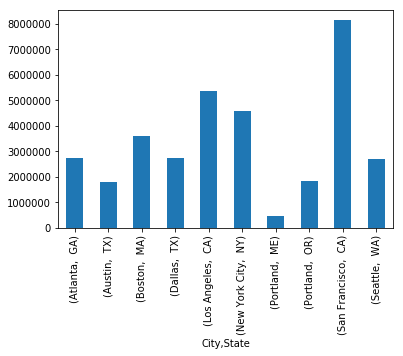

In [52]:
res_city = sales.groupby(['City','State'])['Total_Sales'].sum()
res_city.plot(kind = 'bar')

#### Task 3. What were the top 3 products bought every month

In [15]:
new = sales.set_index('Product')
new.groupby(['Month'])['Quantity_Ordered'].apply(lambda x : x.nlargest(3))

Month  Product               
1      AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    7
2      AAA Batteries (4-pack)    7
       AA Batteries (4-pack)     6
       AAA Batteries (4-pack)    6
3      AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    6
       AAA Batteries (4-pack)    6
4      AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    6
       AAA Batteries (4-pack)    6
5      AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    6
       AAA Batteries (4-pack)    6
6      AAA Batteries (4-pack)    9
       AAA Batteries (4-pack)    6
       AAA Batteries (4-pack)    6
7      AAA Batteries (4-pack)    9
       AAA Batteries (4-pack)    9
       AAA Batteries (4-pack)    8
8      AAA Batteries (4-pack)    8
       AAA Batteries (4-pack)    7
       AAA Batteries (4-pack)    7
9      AAA Batteries (4-pack)    6
       AA Batteries (4-pack)     6
       AA Batteries (4-pack)     5
10     AAA Batteries (4-p

#### Task 3. What were the top product saleswise every month

In [16]:
def mon_name(df):
    if df == 1:
        return 'Jan'
    elif df == 2:
        return 'Feb'
    elif df == 3:
        return 'Mar'
    elif df == 4:
        return 'Apr'
    elif df == 5:
        return 'May'
    elif df == 6:
        return 'Jun'
    elif df == 7:
        return 'Jul'
    elif df == 8:
        return 'Aug'
    elif df == 9:
        return 'Sep'
    elif df == 10:
        return 'Oct'
    elif df == 11:
        return 'Nov'
    else:
        return 'Dec'
new = sales.set_index('Product')    
new['Month'] = new['Month'].apply(mon_name)

In [17]:
new['Month'] = new['Month']
new.groupby(['Month'])['Total_Sales'].apply(lambda x : x.nlargest(1))

Month  Product           
Apr    Macbook Pro Laptop    3400.00
Aug    Macbook Pro Laptop    1700.00
Dec    Macbook Pro Laptop    1700.00
Feb    Macbook Pro Laptop    1700.00
Jan    ThinkPad Laptop       1999.98
Jul    Macbook Pro Laptop    1700.00
Jun    Macbook Pro Laptop    3400.00
Mar    Macbook Pro Laptop    1700.00
May    Macbook Pro Laptop    3400.00
Nov    Macbook Pro Laptop    1700.00
Oct    ThinkPad Laptop       1999.98
Sep    Macbook Pro Laptop    1700.00
Name: Total_Sales, dtype: float64

#### Task 4. Which product categories where ordered together more often

In [18]:
sales_new = sales[sales.Order_ID.duplicated(keep = False)]

In [19]:
sales_new['group_category'] = sales_new.groupby('Order_ID')['Product'].transform(lambda x : ','.join(x))

In [20]:
sales_new = sales_new[['Order_ID', 'group_category']].drop_duplicates()

In [21]:
sales_new.head()

,Order_ID,group_category
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [22]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in sales_new.group_category:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
    
most_often = pd.DataFrame(count.most_common(10), columns = ['Category','No. of occurences'])
most_often

,Category,No. of occurences
0,"(Google Phone, USB-C Charging Cable, Wired Hea...",82
1,"(iPhone, Lightning Charging Cable, Wired Headp...",59
2,"(iPhone, Lightning Charging Cable, Apple Airpo...",43
3,"(Google Phone, USB-C Charging Cable, Bose Soun...",35
4,"(Vareebadd Phone, USB-C Charging Cable, Wired ...",32
5,"(iPhone, Apple Airpods Headphones, Wired Headp...",26
6,"(Google Phone, Bose SoundSport Headphones, Wir...",23
7,"(Vareebadd Phone, USB-C Charging Cable, Bose S...",15
8,"(USB-C Charging Cable, Bose SoundSport Headpho...",4
9,"(Lightning Charging Cable, Apple Airpods Headp...",4


In [23]:
sales.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Total_Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### Task 5. What is the best time slot for advertisement in order to increase the purchase

In [24]:
sales['hour'] = sales.Order_Date.dt.hour

In [39]:
sales.shape

(182735, 11)

In [26]:
sales.groupby('hour')['Total_Sales'].sum()

hour
0      698694.76
1      447663.86
2      234191.08
3      142976.54
4      161350.57
5      224313.72
6      441523.14
7      734595.75
8     1181363.76
9     1612498.90
10    1907179.29
11    2267169.73
12    2269676.91
13    2118394.83
14    2045085.42
15    1900151.56
16    1864530.92
17    2086082.23
18    2176209.65
19    2370005.59
20    2242856.37
21    2013288.02
22    1578173.21
23    1161803.96
Name: Total_Sales, dtype: float64

### Plot the graph

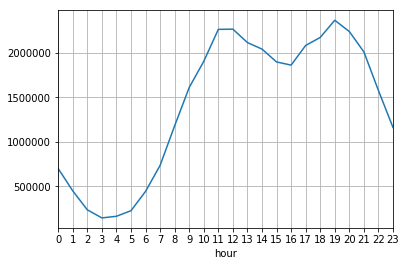

In [28]:
time_slot = sales.groupby('hour')['Total_Sales'].sum()
time_slot.plot(xticks = time_slot.index)
plt.grid()

#### Task 6. What product sold the most?

In [53]:
sales.groupby('Product')['Quantity_Ordered'].count()

Product
20in Monitor                   4032
27in 4K Gaming Monitor         6122
27in FHD Monitor               7386
34in Ultrawide Monitor         6058
AA Batteries (4-pack)         20214
AAA Batteries (4-pack)        20293
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
Flatscreen TV                  4705
Google Phone                   5433
LG Dryer                        640
LG Washing Machine              649
Lightning Charging Cable      21308
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
USB-C Charging Cable          21523
Vareebadd Phone                2020
Wired Headphones              18552
iPhone                         6725
Name: Quantity_Ordered, dtype: int64

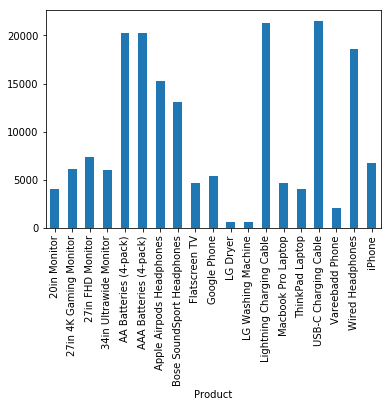

In [54]:
product_sold = sales.groupby('Product')['Quantity_Ordered'].count()
product_sold.plot(kind='bar')

#### Task 7. Highest selling in which state

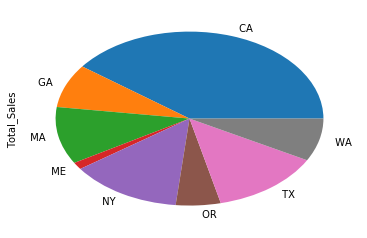

In [70]:
sales.groupby('State')['Total_Sales'].sum().plot(kind = 'pie')